#  CE-40959: Deep Learning

## Homework 5 - 2:  EBGAN

The goal is to train a GAN with an auto-encoder as its discriminator.
For further information read the [paper of EBGAN](https://arxiv.org/abs/1609.03126).

Good luck

In [92]:
import numpy as np

In [93]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [94]:
# MNIST Dataset
original_train_dataset = datasets.MNIST(root='./mnist_data/', train=True, transform=transforms.ToTensor(), download=True)
original_test_dataset = datasets.MNIST(root='./mnist_data/', train=False, transform=transforms.ToTensor(), download=True)

In [95]:
CUDA = True
BATCH_SIZE = 64

In [96]:
# Define Train loader
train_tensors = original_train_dataset.data.float() / 255
test_tensors = original_test_dataset.data.float() / 255

train_dataset = torch.utils.data.TensorDataset(train_tensors, original_train_dataset.targets)
test_dataset = torch.utils.data.TensorDataset(test_tensors, original_test_dataset.targets)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
def show(image_batch, rows=1):
    # Set Plot dimensions
    cols = np.ceil(image_batch.shape[0] / rows)
    plt.rcParams['figure.figsize'] = (0.0 + cols, 0.0 + rows) # set default size of plots
    
    for i in range(image_batch.shape[0]):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(image_batch[i], cmap="gray", vmin=0, vmax=1)
        plt.axis('off')
    plt.show()

---

In [99]:
class AutoEncoderMSE(nn.Module):
    def __init__(self, input_dim, encoder_dims, decoder_dims, dropout_rate=0.5):
        super(AutoEncoderMSE, self).__init__()
        
        self.input_dim = input_dim
        ########################## TODO ##########################
        # self.input_dropout must be a dropout module with p=dropout_rate
        self.input_dropout = nn.Dropout2d(p=dropout_rate)
        ######################## END TODO ########################
        
        
        # Encoder part
        encoder_layers = []
        ########################## TODO ##########################
        # Define encoder layers and add them to `encoder_layers`
        # Use nn.LeakyReLU(0.2) for activation functions
        encoder_layers.append(nn.Linear(input_dim, encoder_dims[0]))
        encoder_layers.append(nn.LeakyReLU(0.2))
        for i in range(1, len(encoder_dims)):
            encoder_layers.append(nn.Linear(encoder_dims[i-1], encoder_dims[i]))
            encoder_layers.append(nn.LeakyReLU(0.2))
        ######################## END TODO ########################
        self.encoder = nn.Sequential(*encoder_layers)
        
        last_encoder_dim = ([input_dim] + encoder_dims)[-1]

        # Decoder part
        decoder_layers = []
        ########################## TODO ##########################
        # Define decoder layers and add them to `decoder_layers`
        # Use nn.LeakyReLU(0.2) for activation functions
        # Last layer does not need any activation function
        decoder_layers.append(nn.Linear(last_encoder_dim, decoder_dims[0]))
        decoder_layers.append(nn.LeakyReLU(0.2))
        for i in range(1, len(decoder_dims)):
            decoder_layers.append(nn.Linear(decoder_dims[0], decoder_dims[1]))
            decoder_layers.append(nn.LeakyReLU(0.2))
        decoder_layers.append(nn.Linear(decoder_dims[-1], input_dim))
        ######################## END TODO ########################
        self.decoder = nn.Sequential(*decoder_layers)
        

    def forward(self, x):
        ########################## TODO ##########################
        # Complete the flow
        # x > dropout > encoder > h > decoder > output > mse
        # Note that mse.shape = (batch_size, )
        # DO NOT FORGET TO ADD DROPOUT LAYER
        dropped = self.input_dropout(x)
        encoded = self.encoder(dropped)
        decoded = self.decoder(encoded)
        mse = F.mse_loss(decoded, x, reduction='none').mean(dim=1)
        ######################## END TODO ########################
        return mse
      
discriminator = AutoEncoderMSE(784, [256, 128, 64], [128, 256], dropout_rate=0.5)

In [100]:
generator = nn.Sequential(
    nn.Linear(128, 128),
    nn.LeakyReLU(0.2),
    nn.Linear(128, 256),
    nn.Dropout(),
    nn.LeakyReLU(0.2),
    nn.Linear(256, 512),
    nn.LeakyReLU(0.2),
    nn.Linear(512, 784),
    nn.Sigmoid()
)

In [101]:
if CUDA:
  discriminator.cuda()
  generator.cuda()

In [102]:
LEARNING_RATE_D = 0.0002
LEARNING_RATE_G = 0.0002

opt_D = optim.Adam(discriminator.parameters(), lr=LEARNING_RATE_D)
opt_G = optim.Adam(generator.parameters(), lr=LEARNING_RATE_G)

In [103]:
N_EPOCH = 100

epoch: 0 	 last batch loss D: 4.9562153816223145 	 last batch loss G: 21.426002502441406


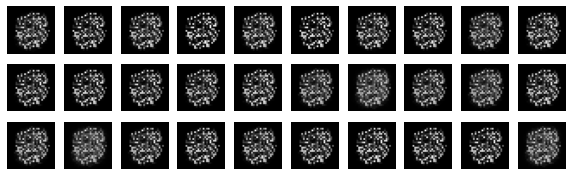

epoch: 1 	 last batch loss D: 4.714657306671143 	 last batch loss G: 18.652854919433594


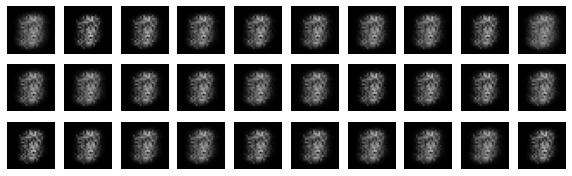

epoch: 2 	 last batch loss D: 0.32232892513275146 	 last batch loss G: 70.8481674194336


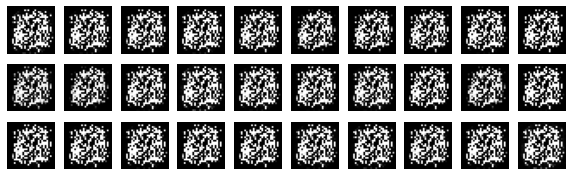

epoch: 3 	 last batch loss D: 0.21403774619102478 	 last batch loss G: 74.66429138183594


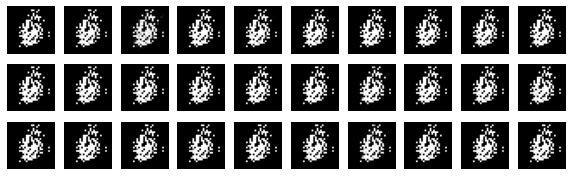

epoch: 4 	 last batch loss D: 0.0660056620836258 	 last batch loss G: 80.82398986816406


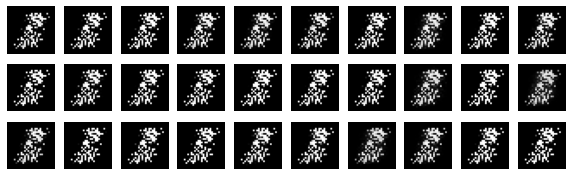

epoch: 5 	 last batch loss D: 0.09405186772346497 	 last batch loss G: 32.96385192871094


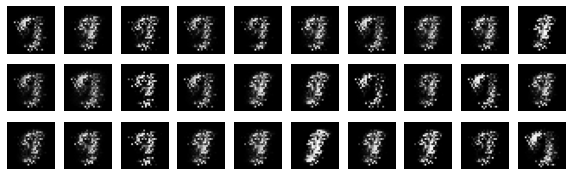

epoch: 6 	 last batch loss D: 1.3186477422714233 	 last batch loss G: 24.27863311767578


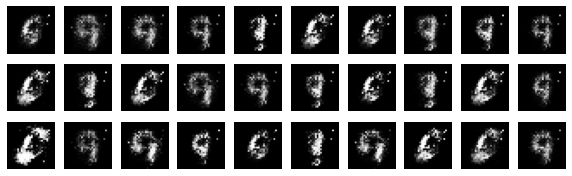

epoch: 7 	 last batch loss D: 0.8992252349853516 	 last batch loss G: 21.5526065826416


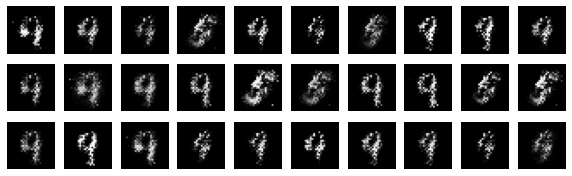

epoch: 8 	 last batch loss D: 1.9262315034866333 	 last batch loss G: 17.235336303710938


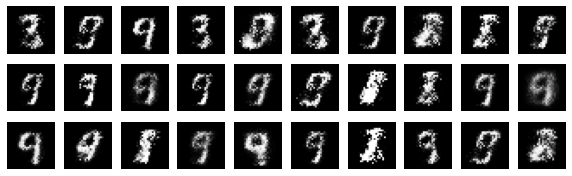

epoch: 9 	 last batch loss D: 0.8071032166481018 	 last batch loss G: 18.98934555053711


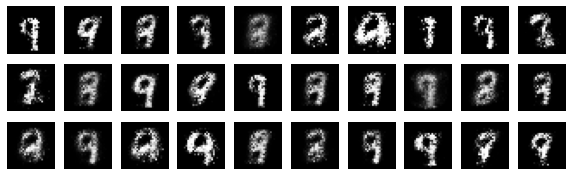

epoch: 10 	 last batch loss D: 2.081547260284424 	 last batch loss G: 17.391279220581055


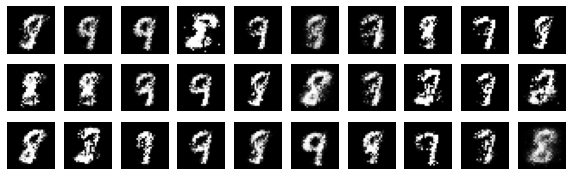

epoch: 11 	 last batch loss D: 1.44918954372406 	 last batch loss G: 20.91706657409668


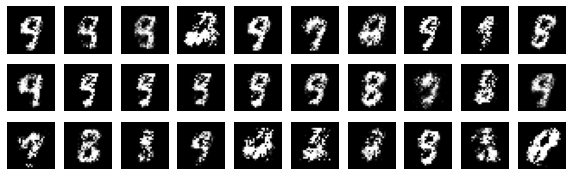

epoch: 12 	 last batch loss D: 3.81095290184021 	 last batch loss G: 19.424339294433594


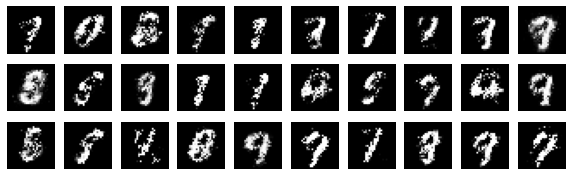

epoch: 13 	 last batch loss D: 3.4322476387023926 	 last batch loss G: 17.964344024658203


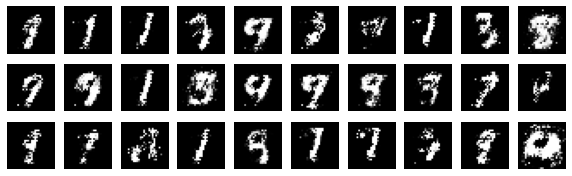

epoch: 14 	 last batch loss D: 3.3958396911621094 	 last batch loss G: 16.911596298217773


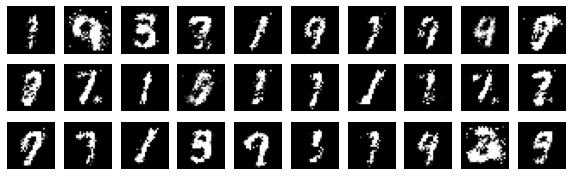

epoch: 15 	 last batch loss D: 2.829035758972168 	 last batch loss G: 17.439538955688477


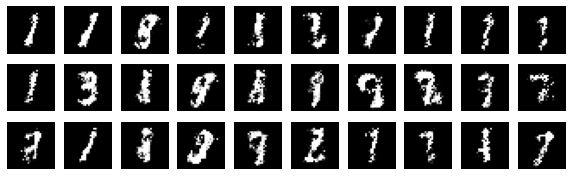

epoch: 16 	 last batch loss D: 3.5385782718658447 	 last batch loss G: 16.20608901977539


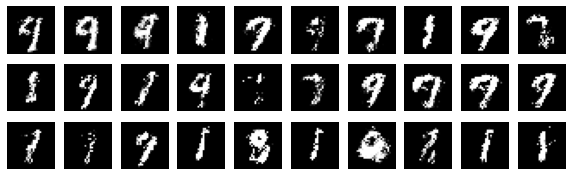

epoch: 17 	 last batch loss D: 2.817390203475952 	 last batch loss G: 15.783297538757324


epoch: 18 	 last batch loss D: 3.949368715286255 	 last batch loss G: 14.273271560668945


epoch: 19 	 last batch loss D: 3.0464727878570557 	 last batch loss G: 14.47330093383789


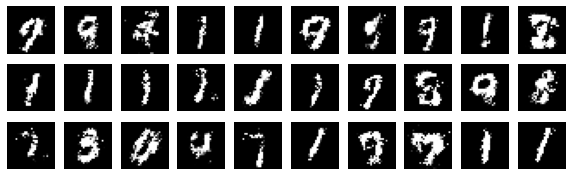

epoch: 20 	 last batch loss D: 4.781423568725586 	 last batch loss G: 16.6643009185791


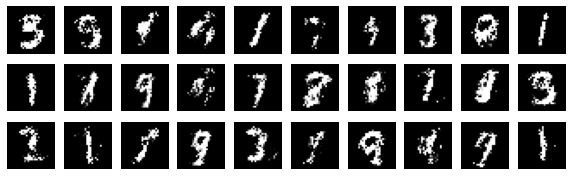

epoch: 21 	 last batch loss D: 4.371860504150391 	 last batch loss G: 15.693790435791016


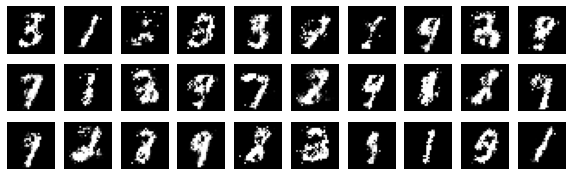

epoch: 22 	 last batch loss D: 5.350000858306885 	 last batch loss G: 14.447122573852539


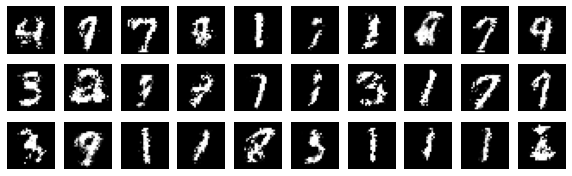

epoch: 23 	 last batch loss D: 2.9288816452026367 	 last batch loss G: 15.358400344848633


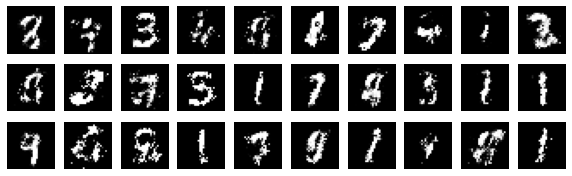

epoch: 24 	 last batch loss D: 2.20681095123291 	 last batch loss G: 16.403432846069336


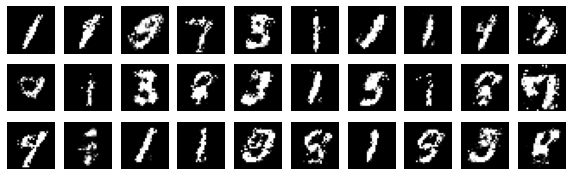

epoch: 25 	 last batch loss D: 5.90035343170166 	 last batch loss G: 15.80363655090332


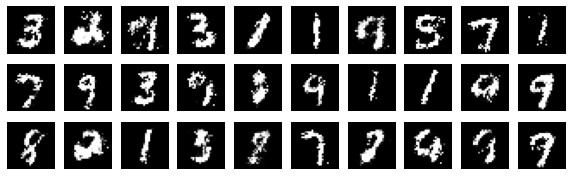

epoch: 26 	 last batch loss D: 6.765780448913574 	 last batch loss G: 13.16352653503418


epoch: 27 	 last batch loss D: 4.84465217590332 	 last batch loss G: 16.108150482177734


epoch: 28 	 last batch loss D: 6.69064998626709 	 last batch loss G: 15.296006202697754


epoch: 29 	 last batch loss D: 3.69341778755188 	 last batch loss G: 13.78189754486084


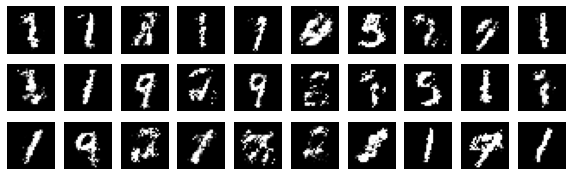

epoch: 30 	 last batch loss D: 6.533713340759277 	 last batch loss G: 16.28140640258789


epoch: 31 	 last batch loss D: 5.420819282531738 	 last batch loss G: 15.388789176940918


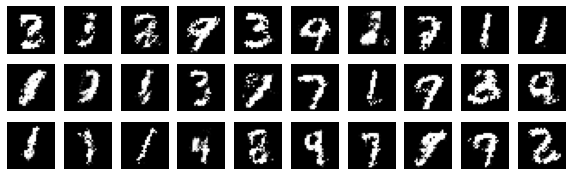

epoch: 32 	 last batch loss D: 3.697047233581543 	 last batch loss G: 15.60610580444336


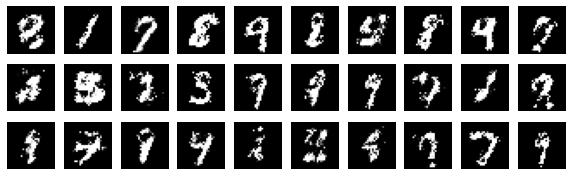

epoch: 33 	 last batch loss D: 6.7190632820129395 	 last batch loss G: 14.579517364501953


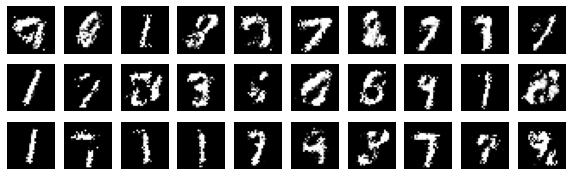

epoch: 34 	 last batch loss D: 4.112201690673828 	 last batch loss G: 15.348726272583008


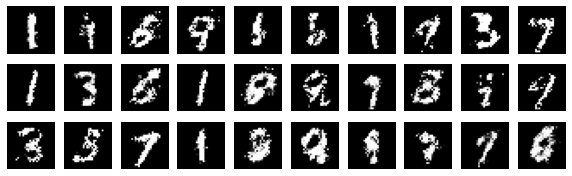

epoch: 35 	 last batch loss D: 5.063630104064941 	 last batch loss G: 14.09911823272705


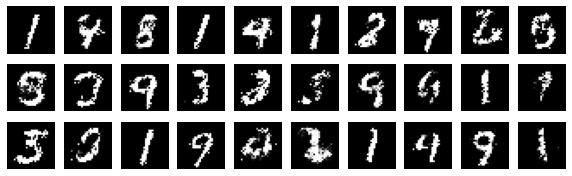

epoch: 36 	 last batch loss D: 2.8207650184631348 	 last batch loss G: 15.808300971984863


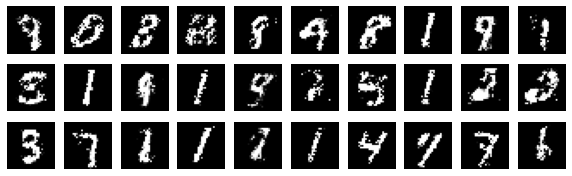

epoch: 37 	 last batch loss D: 5.943377494812012 	 last batch loss G: 13.040410995483398


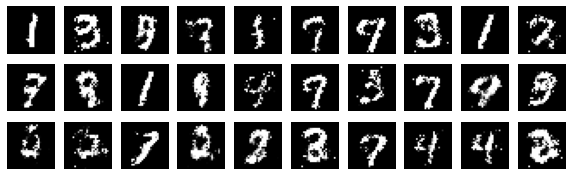

epoch: 38 	 last batch loss D: 5.810496807098389 	 last batch loss G: 13.800036430358887


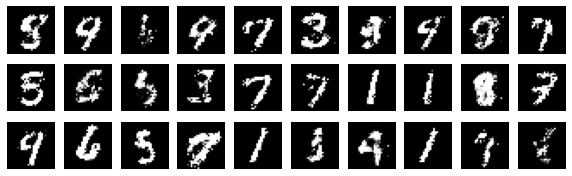

epoch: 39 	 last batch loss D: 5.625617027282715 	 last batch loss G: 13.018253326416016


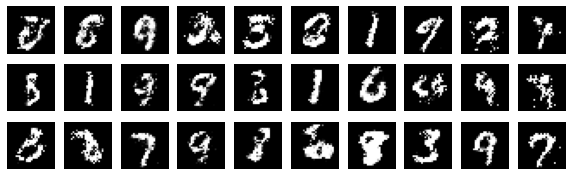

epoch: 40 	 last batch loss D: 5.167403221130371 	 last batch loss G: 15.674771308898926


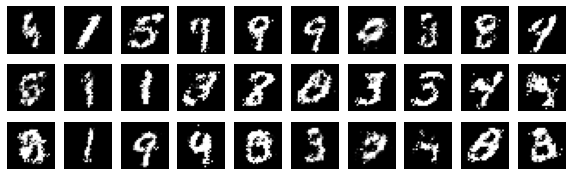

epoch: 41 	 last batch loss D: 8.335083961486816 	 last batch loss G: 14.640487670898438


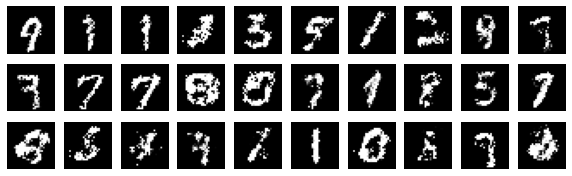

epoch: 42 	 last batch loss D: 3.541856288909912 	 last batch loss G: 15.264142036437988


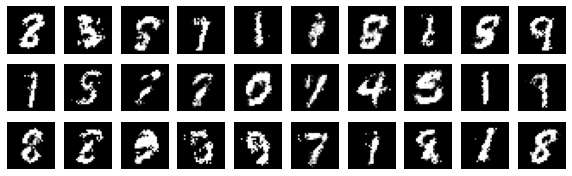

epoch: 43 	 last batch loss D: 5.509593486785889 	 last batch loss G: 11.289690017700195


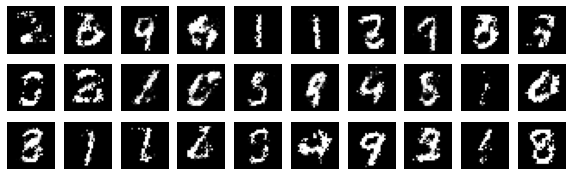

epoch: 44 	 last batch loss D: 7.132684707641602 	 last batch loss G: 11.665688514709473


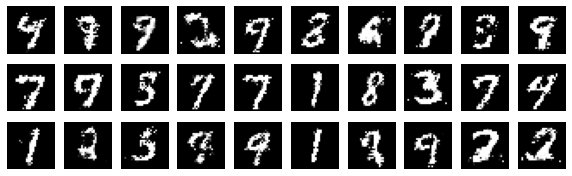

epoch: 45 	 last batch loss D: 4.013942241668701 	 last batch loss G: 13.474321365356445


epoch: 46 	 last batch loss D: 5.263222694396973 	 last batch loss G: 13.786527633666992


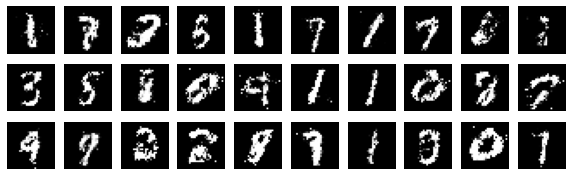

epoch: 47 	 last batch loss D: 4.29754114151001 	 last batch loss G: 12.818215370178223


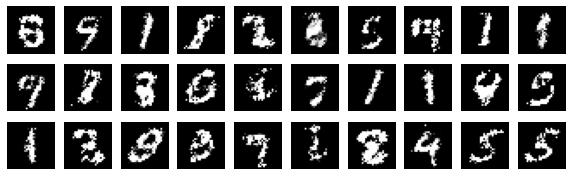

epoch: 48 	 last batch loss D: 5.123025894165039 	 last batch loss G: 12.48243522644043


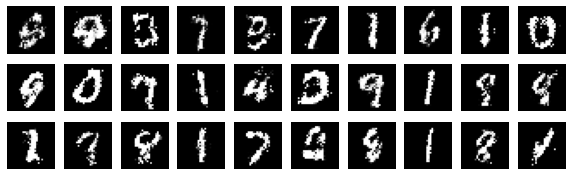

epoch: 49 	 last batch loss D: 5.1156110763549805 	 last batch loss G: 13.993764877319336


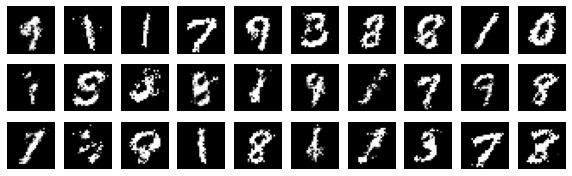

epoch: 50 	 last batch loss D: 7.321357250213623 	 last batch loss G: 14.19444465637207


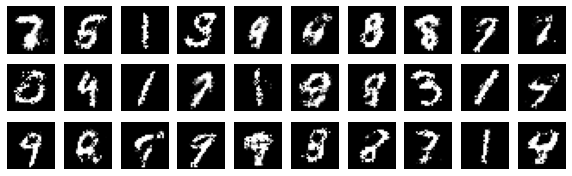

epoch: 51 	 last batch loss D: 7.294548034667969 	 last batch loss G: 14.182110786437988


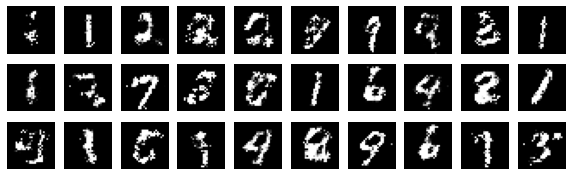

epoch: 52 	 last batch loss D: 7.265077590942383 	 last batch loss G: 14.653209686279297


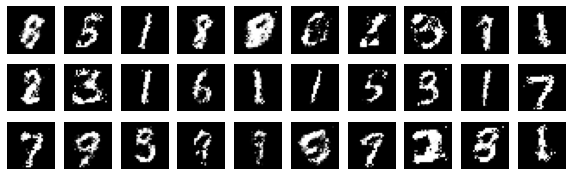

epoch: 53 	 last batch loss D: 8.041268348693848 	 last batch loss G: 12.218557357788086


epoch: 54 	 last batch loss D: 5.622808456420898 	 last batch loss G: 12.724380493164062


epoch: 55 	 last batch loss D: 7.816319465637207 	 last batch loss G: 13.678071975708008


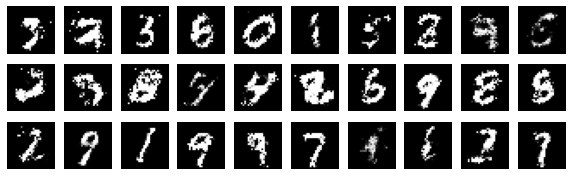

epoch: 56 	 last batch loss D: 7.113827228546143 	 last batch loss G: 13.687190055847168


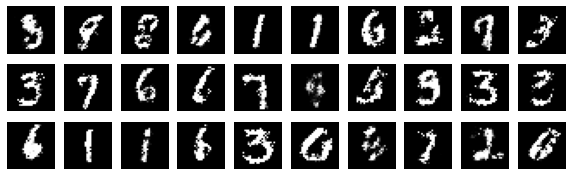

epoch: 57 	 last batch loss D: 6.720028877258301 	 last batch loss G: 13.772595405578613


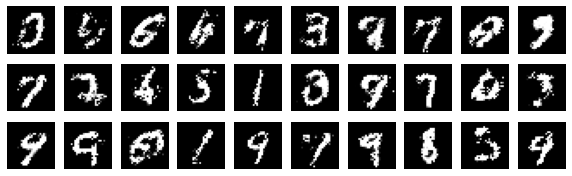

epoch: 58 	 last batch loss D: 10.12906265258789 	 last batch loss G: 15.270809173583984


epoch: 59 	 last batch loss D: 8.09384536743164 	 last batch loss G: 13.227267265319824


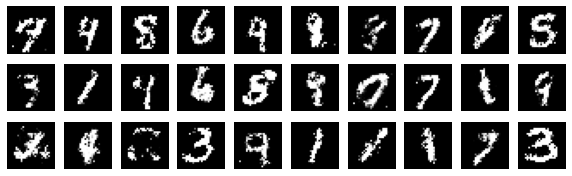

epoch: 60 	 last batch loss D: 3.9124560356140137 	 last batch loss G: 14.032445907592773


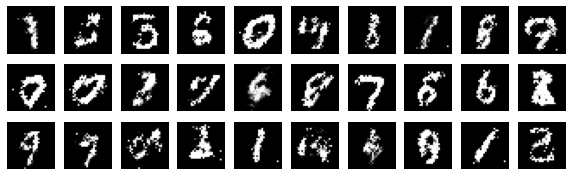

epoch: 61 	 last batch loss D: 8.278663635253906 	 last batch loss G: 13.73699951171875


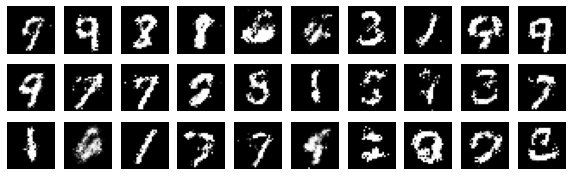

epoch: 62 	 last batch loss D: 8.854297637939453 	 last batch loss G: 13.815528869628906


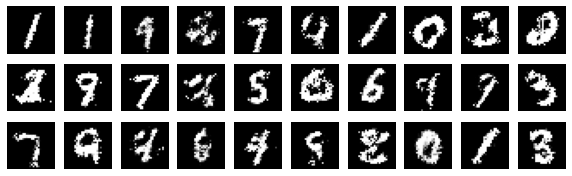

epoch: 63 	 last batch loss D: 4.883362293243408 	 last batch loss G: 13.885112762451172


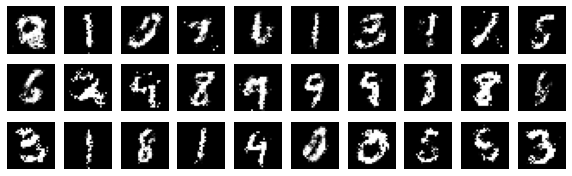

epoch: 64 	 last batch loss D: 6.551201820373535 	 last batch loss G: 11.863313674926758


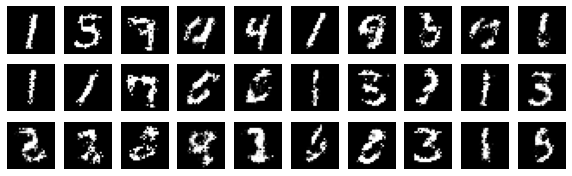

epoch: 65 	 last batch loss D: 7.948550224304199 	 last batch loss G: 12.53242301940918


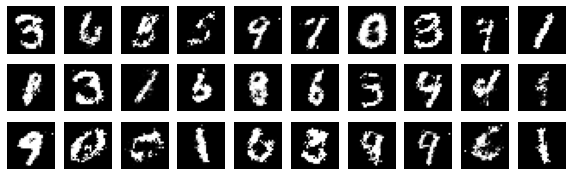

epoch: 66 	 last batch loss D: 5.757308006286621 	 last batch loss G: 13.114556312561035


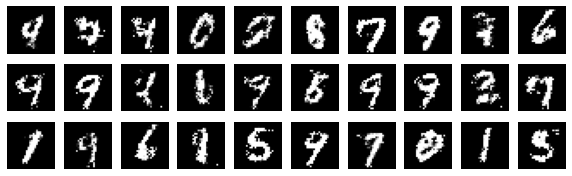

epoch: 67 	 last batch loss D: 6.764006614685059 	 last batch loss G: 13.491119384765625


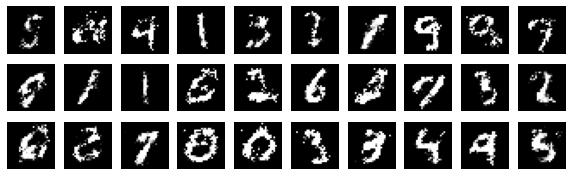

epoch: 68 	 last batch loss D: 4.921631336212158 	 last batch loss G: 13.364214897155762


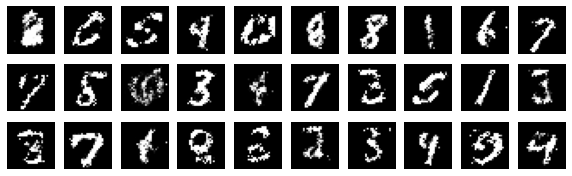

epoch: 69 	 last batch loss D: 4.712312698364258 	 last batch loss G: 14.242984771728516


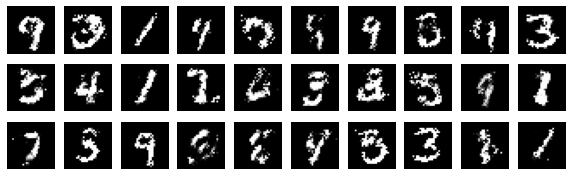

epoch: 70 	 last batch loss D: 6.2881879806518555 	 last batch loss G: 14.573508262634277


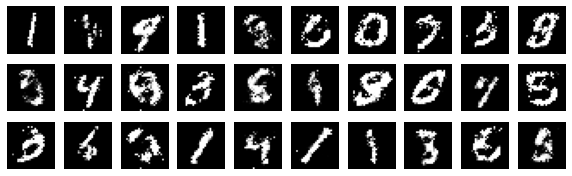

epoch: 71 	 last batch loss D: 5.506773948669434 	 last batch loss G: 12.459920883178711


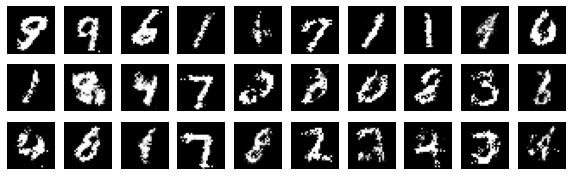

epoch: 72 	 last batch loss D: 10.583368301391602 	 last batch loss G: 12.311504364013672


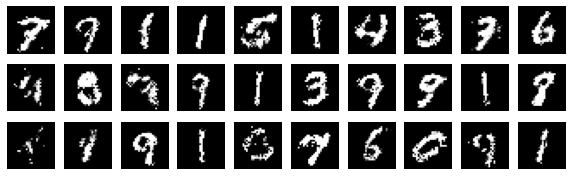

epoch: 73 	 last batch loss D: 5.10007905960083 	 last batch loss G: 13.214723587036133


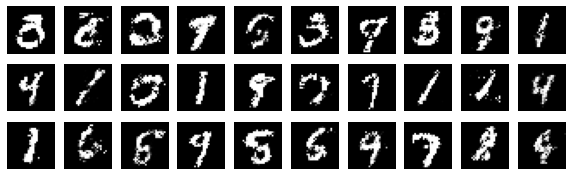

epoch: 74 	 last batch loss D: 12.050148010253906 	 last batch loss G: 12.895500183105469


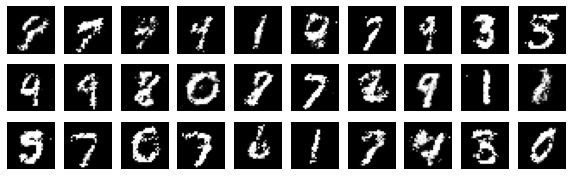

epoch: 75 	 last batch loss D: 6.649895191192627 	 last batch loss G: 11.010531425476074


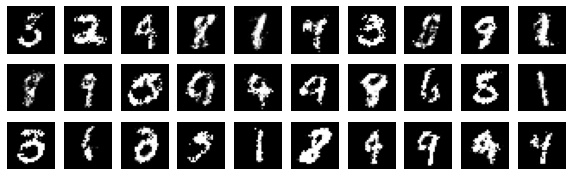

epoch: 76 	 last batch loss D: 4.501941680908203 	 last batch loss G: 13.939556121826172


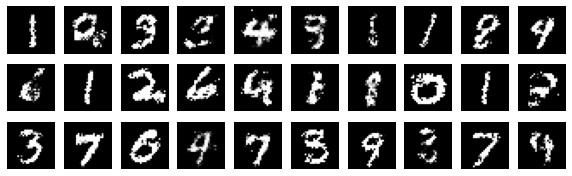

epoch: 77 	 last batch loss D: 6.3353424072265625 	 last batch loss G: 14.67064380645752


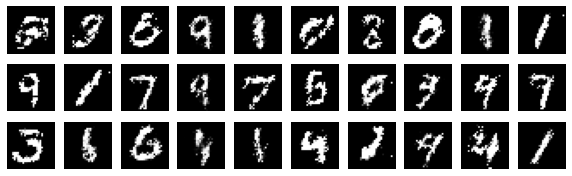

epoch: 78 	 last batch loss D: 6.698841094970703 	 last batch loss G: 16.431453704833984


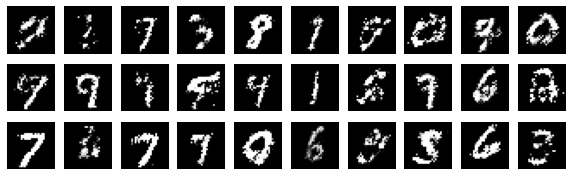

epoch: 79 	 last batch loss D: 8.076523780822754 	 last batch loss G: 12.797693252563477


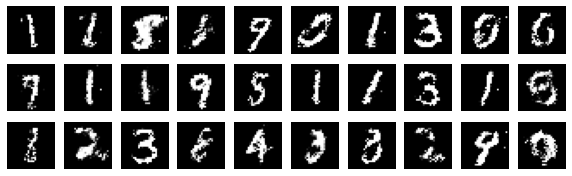

epoch: 80 	 last batch loss D: 5.328509330749512 	 last batch loss G: 13.59740924835205


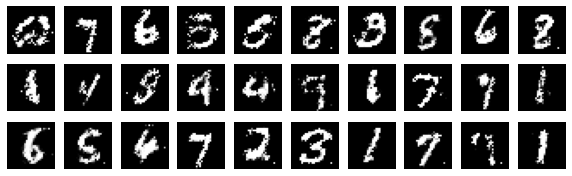

epoch: 81 	 last batch loss D: 9.052896499633789 	 last batch loss G: 12.797602653503418


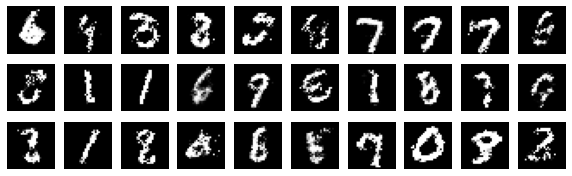

epoch: 82 	 last batch loss D: 8.4596529006958 	 last batch loss G: 13.576690673828125


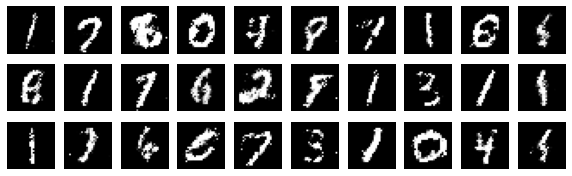

epoch: 83 	 last batch loss D: 6.492987155914307 	 last batch loss G: 14.152185440063477


epoch: 84 	 last batch loss D: 7.889307975769043 	 last batch loss G: 12.966957092285156


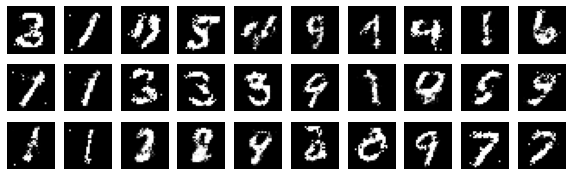

epoch: 85 	 last batch loss D: 6.284633636474609 	 last batch loss G: 15.435020446777344


epoch: 86 	 last batch loss D: 8.148820877075195 	 last batch loss G: 11.839885711669922


epoch: 87 	 last batch loss D: 5.656607151031494 	 last batch loss G: 13.82640266418457


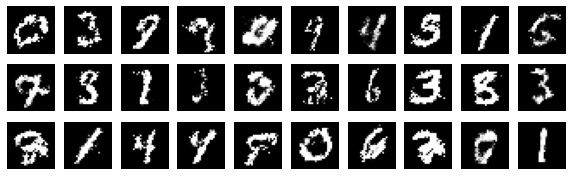

epoch: 88 	 last batch loss D: 7.889739990234375 	 last batch loss G: 12.430313110351562


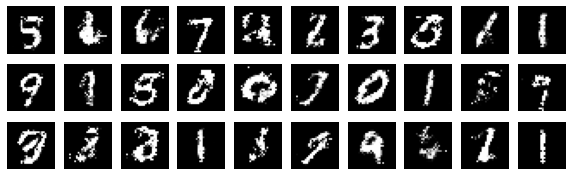

epoch: 89 	 last batch loss D: 6.48897647857666 	 last batch loss G: 13.057592391967773


epoch: 90 	 last batch loss D: 6.479395866394043 	 last batch loss G: 12.563121795654297


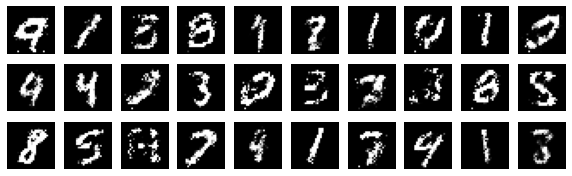

epoch: 91 	 last batch loss D: 9.58026123046875 	 last batch loss G: 13.846171379089355


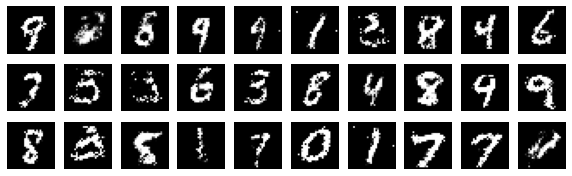

epoch: 92 	 last batch loss D: 10.446964263916016 	 last batch loss G: 12.529157638549805


epoch: 93 	 last batch loss D: 4.954315185546875 	 last batch loss G: 14.130037307739258


epoch: 94 	 last batch loss D: 6.385894775390625 	 last batch loss G: 11.807815551757812


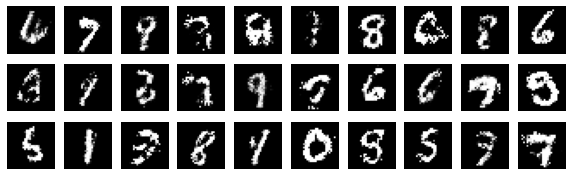

epoch: 95 	 last batch loss D: 6.517148971557617 	 last batch loss G: 13.260525703430176


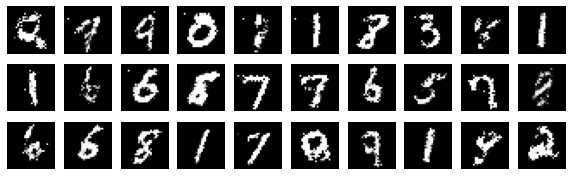

epoch: 96 	 last batch loss D: 9.402926445007324 	 last batch loss G: 12.679170608520508


epoch: 97 	 last batch loss D: 9.681479454040527 	 last batch loss G: 13.904224395751953


epoch: 98 	 last batch loss D: 7.659339904785156 	 last batch loss G: 12.570415496826172


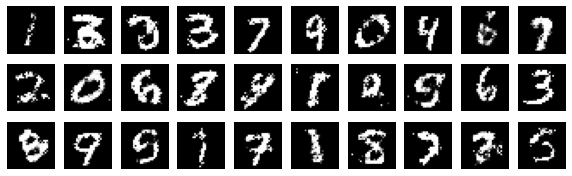

epoch: 99 	 last batch loss D: 7.669139862060547 	 last batch loss G: 12.65144157409668


In [104]:
m = 16
d_l = []
g_l = []
for epoch in range(N_EPOCH):
    d_l += [0]
    g_l += [0]
    for i, (img, label) in enumerate(train_loader):
        img = img.flatten(start_dim=1)

        real_img = img
        if CUDA:
            real_img = real_img.cuda()

        z = torch.randn(img.shape[0], 128)
        if CUDA:
            z = z.cuda()
        fake_img = generator(z)

        # Discriminator Part
        opt_D.zero_grad()
        ########################## TODO ##########################
        # Define loss for discriminator
        Dr = discriminator(real_img)
        Dg = discriminator(fake_img.detach())
        loss_d = (Dr + F.relu(m-Dg)).mean()
        ######################## END TODO ########################
        loss_d.backward()
        opt_D.step()
        
        # Generator Part
        opt_G.zero_grad()
        ########################## TODO ##########################
        # Define loss for generator
        loss_g = discriminator(fake_img).mean()
        ######################## END TODO ########################
        loss_g.backward()
        opt_G.step()
        d_l[-1] += loss_d.item()
        g_l[-1] += loss_g.item()
    
    d_l[-1] /= i
    g_l[-1] /= i
    
    print("epoch: {} \t last batch loss D: {} \t last batch loss G: {}".format(epoch, loss_d.item(), loss_g.item()))
    imgs_to_show = fake_img[:30].view(-1, 28, 28).detach().cpu().numpy()
    show(imgs_to_show, rows=3)


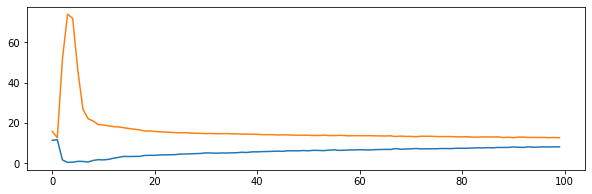

In [111]:
plt.plot(np.arange(100),d_l)
plt.plot(np.arange(100),g_l)
